In [1]:
%run header.ipynb

The bilinear transform is a method for designing digital filters from analog models. More precisely, it brings filters from the Laplace domain to the z-domain. The desired outcome is a difference function, which can be used for the actual filtering process in the discrete time domain.

## Passive RC Lowpass

A simple example for the bilinear transform is the RC lowpass:

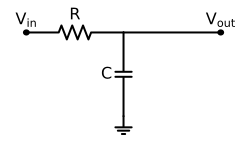

In [2]:
d = schem.Drawing()
d.add(e.DOT, label='$V_{in}$')

d.add(e.RES, label='$R$')
d.push() 

d.add(e.CAP, d='down', label='$C$')
d.add(e.GND)


d.pop()
d.add(e.LINE, d='r')
d.add(e.DOT, d='r', label='$V_{out}$')

d.draw()



**Transfer Function**

The resulting filter has a low pass characteristic with the following frequency response:



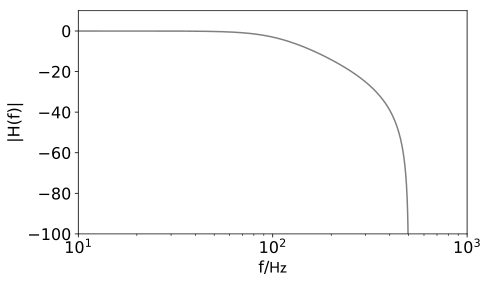

In [3]:

b, a = signal.butter(2, 100,fs=1000)

z,p, k = signal.butter(2, 100, output='zpk', fs=1000)

w, h = signal.freqz_zpk(z, p, k, fs=1000)

fig  = plt.figure()

ax   = fig.add_subplot(111)

ax.plot(w, 20 * np.log10(abs(h)),color = [0.5,0.5,0.5]);

ax.set_xscale('log')
ax.axis((10, 1000, -100, 10));

plt.xlabel('$f/\mathrm{Hz}$');
plt.ylabel('$|H(f)|$');
    



In the Laplace domain its transfer function is defined as:

$$
H(s) = \frac{\omega_c}{\omega_c + s} =  \frac{1}{1 + \frac{s}{\omega_c}} 
$$

$s$ represents the Laplace operator

$$
s = \sigma + j \omega 
$$

and the cutoff frequency of the passive filter is:

$$
\omega_c = \frac{1}{RC}
$$

**Substitution**

For a transform to the z-domain, the Laplace operator $s$ is subsstituted by the $z$ operator:

$$
s = \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}}
$$

$$
z = e^{sT}
$$


The following steps rearrange the resulting transfer function to be comprised of summands with the factor $z^{-n}$:

$$
\begin{align} %
%
H(z) = & \frac{\omega_c}{\omega_c + \frac{2}{T}  \frac{1-z^{-1}}{1+z^{-1}}} \\ 
%
= & \frac{\frac{T}{2} \omega_c}{ \frac{T}{2} \omega_c +   \frac{1-z^{-1}}{1+z^{-1}}} \\
% 
= & \frac{\frac{T}{2} \omega_c (1+ z^{-1})}{ \frac{T}{2} \omega_c (1+ z^{-1}) +   1-z^{-1}} \\
%
= & \frac{\frac{T}{2} \omega_c  + \frac{T}{2} \omega_c z^{-1}}{ \frac{T}{2} \omega_c (1+ z^{-1}) +   1-z^{-1}} \\
%
= & \frac{\frac{T}{2} \omega_c  + \frac{T}{2} \omega_c z^{-1}}{ \frac{T}{2} \omega_c + \frac{T}{2} \omega_c z^{-1} +  1-z^{-1}} \\
%  
= & \frac{\frac{T}{2} \omega_c  + \frac{T}{2} \omega_c z^{-1}}{1 + \frac{T}{2} \omega_c + (\frac{T}{2} \omega_c -1 )z^{-1}} \\
%
\end{align}
$$


For getting the coefficients of our digital filter, the transfer function needs to meet the following strucutre where $a_0=1$:


$$
H(z) = \frac{b_0 + b_1 z^{-1}}{1+ a_1 z^{-1}}
$$

This is achieved by expanding and simplifying:

$$
\begin{align} %
%
  H(z)  = & \frac{\frac{T}{2} \omega_c  + \frac{T}{2} \omega_c z^{-1}}{ \underbrace{ \mathbf{\color{gray} 1 + \frac{T}{2} \omega_c }}_{\text{must be 1}} + \left(\frac{T}{2} \omega_c -1 \right)z^{-1}} \\
 %
  = & \frac{\frac{\frac{T}{2} \omega_c}{ 1 + \frac{T}{2} \omega_c}  + \frac{ \frac{T}{2} \omega_c}{ 1 + \frac{T}{2} \omega_c} z^{-1}}{1+ \left(\frac{\frac{T}{2} \omega_c}{1 + \frac{T}{2} \omega_c} - \frac{1}{1 + \frac{T}{2} \omega_c} \right)z^{-1}} \\
 %
 = & \frac{\frac{\frac{T}{2} \omega_c}{ 1 + \frac{T}{2} \omega_c}  + \frac{ \frac{T}{2} \omega_c}{ 1 + \frac{T}{2} \omega_c} z^{-1}}{1+ \left(\frac{\frac{T}{2} \omega_c -1}{ \frac{T}{2} \omega_c + 1}  \right)z^{-1}} \\
\end{align}
$$

**Coefficients**

Following the above rearrangements, the coefficients can be directly extracted from the transfer funcion:

$$
H(z) = \frac{\frac{\frac{T}{2} \omega_c}{ 1 + \frac{T}{2} \omega_c}  + \frac{ \frac{T}{2} \omega_c}{ 1 + \frac{T}{2} \omega_c} z^{-1}}{1+ \left(\frac{\frac{T}{2} \omega_c -1}{ \frac{T}{2} \omega_c + 1}  \right)z^{-1}} = \frac{b_0 + b_1 z^{-1}}{1+ a_1 z^{-1}}
$$



$$ 
\begin{align}
\mathbf b_0 = & \frac{\frac{T}{2} \omega_c}{ 1 + \frac{T}{2} \omega_c} \\
\mathbf b_1 = &	\frac{\frac{T}{2} \omega_c}{ 1 + \frac{T}{2} \omega_c} \\
\mathbf a_1 = &	\frac{\frac{T}{2} \omega_c -1}{ \frac{T}{2} \omega_c + 1}   \\
\end{align}
$$

**Filter Topology**

The original dependence of the electrical components R and C is not important at this point.
However, with $\omega_c$ = $2 \pi f_0$ we can get the exact coefficients for any cutoff frequency
which can be used for the difference equation or applied in the following topology:

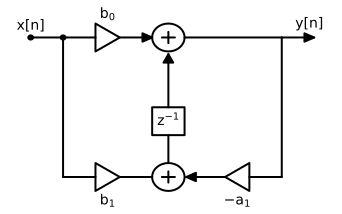

In [4]:

d = schem.Drawing(unit=1, fontsize=14)

d.add(e.DOT, label='$x[n]$');
d.add(e.LINE, d='r')
d.add(e.DOT);

d.push()

d.add(e.LINE, d='r')
d.add(dsp.AMP,toplabel='$b_0$')
d.add(e.LINE, d='r')
d.add(e.ARROWHEAD)
s0 = d.add(dsp.SUM)

d.pop()

d.add(e.LINE, d='d',l=5)

d.add(e.LINE, d='r')
d.add(dsp.AMP,botlabel='$b_1$')
d.add(e.LINE, d='r')
s1 = d.add(dsp.SUM)

d.add(e.LINE, d='u',xy=s1.N)
z1 = d.add(dsp.BOX, label='$z^{-1}$')
d.add(e.LINE, d='u',l=1.9)
d.add(e.ARROWHEAD)

d.add(e.LINE, d='r',xy=s0.E,l=3)
d.push()

d.add(e.LINE, d='d',l=5)
d.add(e.LINE, d='l')
d.add(dsp.AMP,botlabel='$-a_1$')
d.add(e.LINE, d='l',l=1.2)
d.add(e.ARROWHEAD)

d.pop()
d.add(e.LINE, d='r')
d.add(e.ARROWHEAD,label='$y[n]$')


d.draw();

## Plot Poles and Zeros in Z-Plane

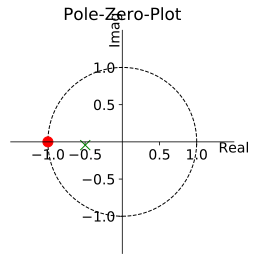

In [5]:
ax = plt.subplot(111)
ax.axis('equal')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
    
uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
ax.add_patch(uc)


b, a, k = signal.butter(2, 490, output='zpk', fs=1000)
 
a[0] *= 2   
    
# zeros
z  = np.roots(b)
t1 = plt.plot(z.real, z.imag, 'ro', ms=10);

# poles
p  = np.roots(a)
t2 = plt.plot(p.real, p.imag, 'gx', ms=10)

plt.suptitle('Pole-Zero-Plot')
plt.xlabel('Real')
plt.ylabel('Imag')
ax.xaxis.set_label_coords(1,   0.5)
ax.yaxis.set_label_coords(0.5, 1)
 
